In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

features = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']
x = df[features]
y = df['AHD']


Logisitic Regression Classifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

my_logreg = LogisticRegression()

my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
score_lr = accuracy_score(y_test, y_predict_lr)
print(score_lr)


0.7183098591549296


ROC Curve and AUC

In [26]:
my_logreg = LogisticRegression()

my_logreg.fit(X_train, y_train)
y_predict_prob_lr = my_logreg.predict_proba(X_test)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


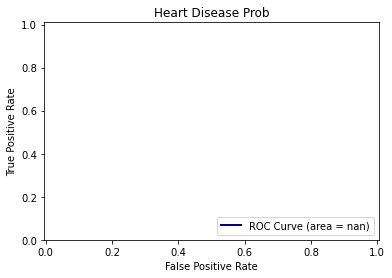

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='navy', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart Disease Prob')
plt.legend(loc="lower right")

plt.show()